In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from iertools.read import read_sql
from dateutil.parser import parse

In [2]:
f = '../osm/CB_006_OS/run/eplusout.sql'
tmp = read_sql(f,read='all')
nombres = tmp.rename_from_sql()
tmp.rename(columns=nombres)
cb = tmp.data

f = '../osm/E2_001_Absort/run/eplusout.sql'
tmp = read_sql(f,read='all')
nombres = tmp.rename_from_sql()
tmp.rename(columns=nombres)
Absort = tmp.data

f = '../osm/E3_001_LowE/run/eplusout.sql'
tmp = read_sql(f,read='all')
nombres = tmp.rename_from_sql()
tmp.rename(columns=nombres)
LowE = tmp.data

f = '../osm/E4_001_SC/run/eplusout.sql'
tmp = read_sql(f,read='all')
nombres = tmp.rename_from_sql()
tmp.rename(columns=nombres)
SC = tmp.data

f = '../osm/E5_001_Todas/run/eplusout.sql'
tmp = read_sql(f,read='all')
nombres = tmp.rename_from_sql()
tmp.rename(columns=nombres)
Estrategias_conjuntas = tmp.data

In [3]:
#Promedio pesado por el volumen de cada zona termica
def Ti_prom(cb):
    cb['Ti'] = (cb['Ti_TZ_BANO1']*12.096+cb['Ti_TZ_RECAMARA1']*39.366+cb['Ti_TZ_COCINA1']*47.9925
                +cb['Ti_TZ_SALA_COMEDOR1']*122.8095+cb['Ti_TZ_BANO2']*34.2063+cb['Ti_TZ_ARMARIO2']*14.904
                +cb['Ti_TZ_RECAMARA2']*36.774+cb['Ti_TZ_RECAMARA2_1']*56.7+cb['Ti_TZ_BANO2_1']*10.7055
                +cb['Ti_TZ_ESTUDIO2']*58.968+cb['Ti_TZ_RECAMARA_PRINCIPAL2']*40.81725)/472.33905
    return cb['Ti']

In [4]:
Ti_prom(cb)
Ti_prom(Absort)
Ti_prom(LowE)
Ti_prom(SC)
Ti_prom(Estrategias_conjuntas)

date
2006-01-01 00:00:00    19.677608
2006-01-01 00:10:00    19.758134
2006-01-01 00:20:00    19.747709
2006-01-01 00:30:00    19.741448
2006-01-01 00:40:00    19.734178
                         ...    
2006-12-31 23:10:00    19.364567
2006-12-31 23:20:00    19.339834
2006-12-31 23:30:00    19.315042
2006-12-31 23:40:00    19.289865
2006-12-31 23:50:00    19.264251
Name: Ti, Length: 52560, dtype: float64

In [5]:
#Minimos promedios mensuales
cb.To.resample('D').min().resample('M').mean()

date
2006-01-31     5.429032
2006-02-28     6.028571
2006-03-31     8.774194
2006-04-30    10.526667
2006-05-31    10.980645
2006-06-30    11.886667
2006-07-31    11.529032
2006-08-31    11.088710
2006-09-30    12.396667
2006-10-31     8.700538
2006-11-30     8.522778
2006-12-31     5.851613
Freq: M, Name: To, dtype: float64

In [6]:
#Maximos promedios mensuales
cb.To.resample('D').max().resample('M').mean()

date
2006-01-31    18.644624
2006-02-28    20.021429
2006-03-31    22.551613
2006-04-30    24.720000
2006-05-31    24.638710
2006-06-30    22.446667
2006-07-31    21.900000
2006-08-31    21.945161
2006-09-30    19.920000
2006-10-31    21.883871
2006-11-30    18.866667
2006-12-31    20.800000
Freq: M, Name: To, dtype: float64

In [40]:
Ti_mensual_diario = pd.DataFrame()

Ti_mensual_diario["To"]     = cb.To.resample('D').min().resample('M').mean()
Ti_mensual_diario["cb"]     = cb.Ti.resample('D').min().resample('M').mean()
Ti_mensual_diario["Absortancia"] = Absort.Ti.resample('D').min().resample('M').mean()
Ti_mensual_diario["LowE"]   = LowE.Ti.resample('D').min().resample('M').mean()
Ti_mensual_diario["SC"]     = SC.Ti.resample('D').min().resample('M').mean()
Ti_mensual_diario["Estrategias conjuntas"]  = Estrategias_conjuntas.Ti.resample('D').min().resample('M').mean()

Ti_mensual_diario

,To,cb,Absortancia,LowE,SC,Estrategias conjuntas
date,,,,,,
2006-01-31,5.429032,11.894545,13.336578,12.344807,14.351375,17.251424
2006-02-28,6.028571,12.490445,13.927913,12.891243,14.843481,17.567141
2006-03-31,8.774194,14.722949,16.304575,14.987016,16.726394,19.345029
2006-04-30,10.526667,16.273778,17.890611,16.442468,18.050030,20.402419
2006-05-31,10.980645,17.413530,19.343010,17.594421,19.014190,21.476692
2006-06-30,11.886667,16.889938,18.273447,17.050530,18.606621,20.741740
2006-07-31,11.529032,16.267409,17.735123,16.434675,17.979749,20.128548
2006-08-31,11.088710,16.496845,18.162678,16.662077,18.054013,20.372860
2006-09-30,12.396667,16.009465,16.976666,16.170821,17.782062,19.622109


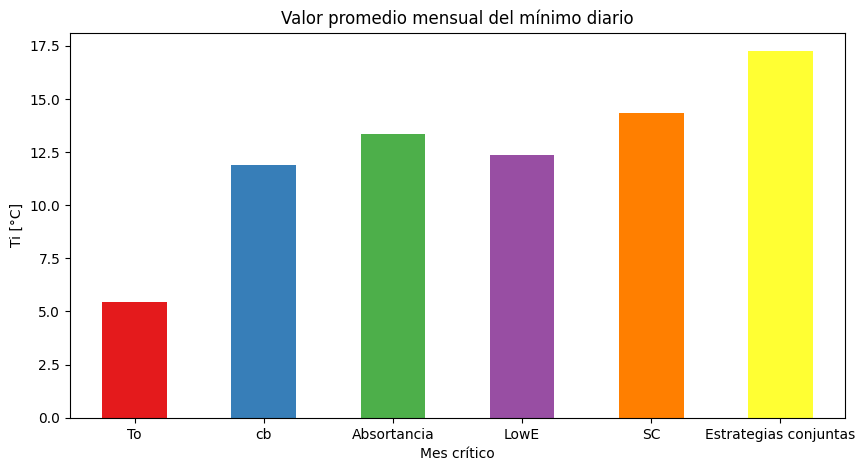

In [41]:
# Definir una paleta de colores
colores = plt.cm.Set1(range(len(Ti_mensual_diario.columns)))

# Graficar las barras para cada columna con colores diferentes
ax = Ti_mensual_diario.iloc[0].plot.bar(figsize=(10, 5), color=colores)

# Configurar etiquetas y título
plt.xlabel('Mes crítico')
plt.ylabel('Ti [°C]')
plt.title('Valor promedio mensual del mínimo diario')

# Girar 90 grados las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Mostrar el gráfico
plt.show()

#### Factor de decremento

In [36]:
factor_decremento = pd.DataFrame()
factor_decremento_mes = pd.DataFrame()

def FD(cb,cb_nombre,mes_critico):
    FD = ((cb.Ti.resample('D').max()-cb.Ti.resample('D').min())/(cb.To.resample('D').max()-cb.To.resample('D').min()))
    factor_decremento[cb_nombre] = FD.resample('M').mean()
    factor_decremento_mes[cb_nombre] = FD.loc['2006-' + mes_critico]
#     factor_decremento = FD.resample('M').mean().add_prefix(cb)
    return FD



In [37]:
cb_fd  = FD(cb,'cb','01')
Absort_fd = FD(Absort,'Absortancia','01')
LowE_fd = FD(LowE,'LowE','01')
SC_fd = FD(SC,'Sistema constructivo','01')
Todas_fd = FD(Estrategias_conjuntas,'Estrategias conjuntas','01')

In [38]:
Todas_fd

date
2006-01-01    0.206960
2006-01-02    0.148378
2006-01-03    0.166343
2006-01-04    0.194436
2006-01-05    0.181455
                ...   
2006-12-27    0.179720
2006-12-28    0.209163
2006-12-29    0.151623
2006-12-30    0.170573
2006-12-31    0.183206
Freq: D, Length: 365, dtype: float64

Text(0.5, 0, 'Mes crítico')

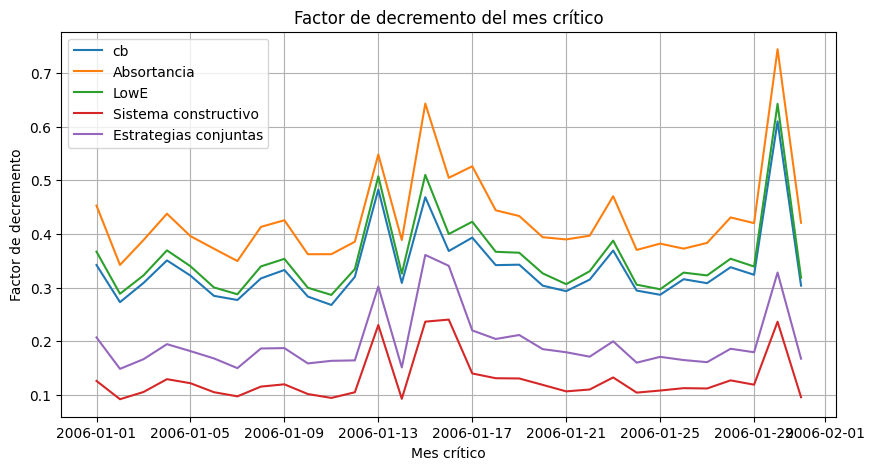

In [39]:
fig, ax = plt.subplots(figsize=(10,5))

meses = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']
ax.plot(factor_decremento_mes)
ax.grid()
ax.legend(factor_decremento_mes.columns)
ax.set_title('Factor de decremento del mes crítico')
ax.set_ylabel('Factor de decremento')
ax.set_xlabel('Mes crítico')


Text(0.5, 0, 'Meses')

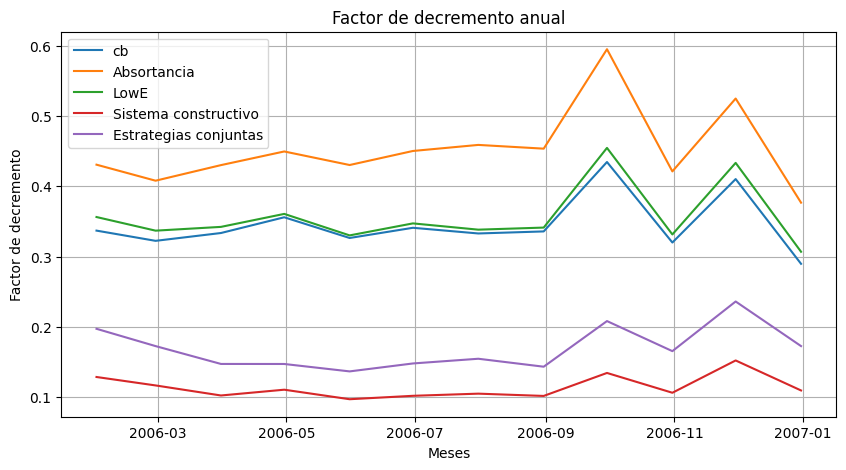

In [12]:
fig, ax = plt.subplots(figsize=(10,5))

meses = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']
ax.plot(factor_decremento)
ax.grid(which='both')
ax.legend(factor_decremento.columns)
ax.set_title('Factor de decremento anual')
ax.set_ylabel('Factor de decremento')
ax.set_xlabel('Meses')


### Grados hora de disconfort

$T_c = 13.5°C + 0.54T_a$

In [13]:
(cb.To.resample('D').max()-cb.To.resample('D').min()).resample('Y').mean()

date
2006-12-31    12.221187
Freq: A-DEC, Name: To, dtype: float64

In [14]:
dTn = 2.5 
Tn = 13.54 + 0.54*cb.To.resample('M').mean()
Tn
Tn_up   = Tn + dTn
Tn_down = Tn - dTn
list(enumerate(zip(Tn_down,Tn_up)))

[(0, (17.359149301942423, 22.359149301942423)),
 (1, (17.87689021477732, 22.87689021477732)),
 (2, (19.214506304468003, 24.214506304468003)),
 (3, (20.354046729600697, 25.354046729600697)),
 (4, (20.39456388608871, 25.39456388608871)),
 (5, (20.184395859375, 25.184395859375)),
 (6, (19.667913952751043, 24.667913952751043)),
 (7, (19.578992708468824, 24.578992708468824)),
 (8, (19.465206377314814, 24.465206377314814)),
 (9, (18.945201915729058, 23.945201915729058)),
 (10, (18.105567761863426, 23.105567761863426)),
 (11, (17.764878223367585, 22.764878223367585))]

if $T_i<Tn_{down}$ $$DDHfrio = \sum_{j} = \left(T_{c} - Ti\right) \Delta t_{j}$$

if $T_i>Tn_{up}$ $$DDHfrio = \sum_{j} = \left(Ti - T_{c}\right) \Delta t_{j}$$

In [15]:
def DDHfrio(cb):
    
    nombre = [nombre for nombre, valor in globals().items() if valor is cb][0]
    
    #Calculando DDHfrio
    cb_frio = cb.loc['2006-01'].copy()
    cb_frio['Tn_down'] = Tn_down[0]
    cb_frio["Tn"] = Tn[0]

    cb_DDHfrio = cb_frio.loc[cb_frio.Ti < cb_frio.Tn_down].Ti
    cb_Tn_down = cb_frio.loc[cb_frio.Ti < cb_frio.Tn_down].Tn_down

    deltaFrio = cb_Tn_down - cb_DDHfrio

    #Grados hora de disconfort frio
    DDHcold = deltaFrio.sum()*1/6
    
    fig, ax = plt.subplots(figsize=(10,4))

    ax.plot(cb_frio.Ti, label = "Temperatura interior")
    ax.plot(cb_DDHfrio,'r-', label = "Disconfort térmico")
    ax.plot(cb_frio.Tn_down, label = "Temperatura de confort mínima")
    ax.plot(cb_frio.Tn, label = "Temperatura de neutralidad")
    ax.set_ylabel("Temperatura [°C]")
    ax.set_xlabel("Mes crítico")
    ax.set_title("Grados hora de disconfort frío [" + nombre + "]")
    ax.legend()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    return DDHcold



C:\Users\landa\AppData\Local\Temp\ipykernel_17148\1204235132.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


2478.0193818382722

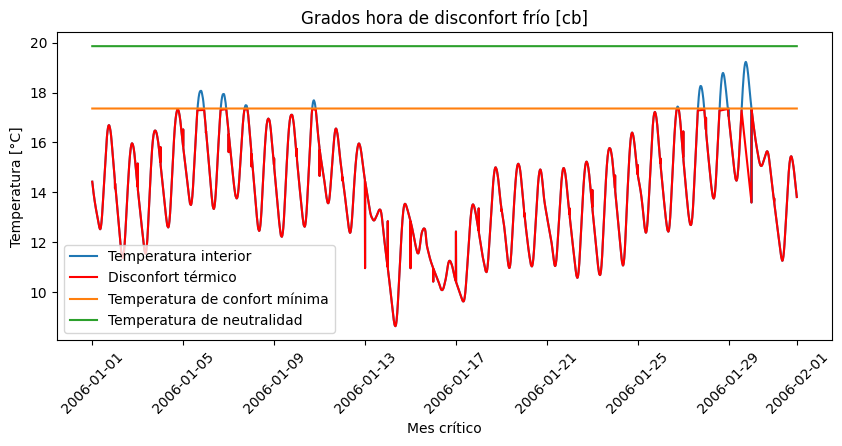

In [16]:
cb_DDHcold = DDHfrio(cb)
cb_DDHcold

C:\Users\landa\AppData\Local\Temp\ipykernel_17148\1204235132.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


1359.680609610756

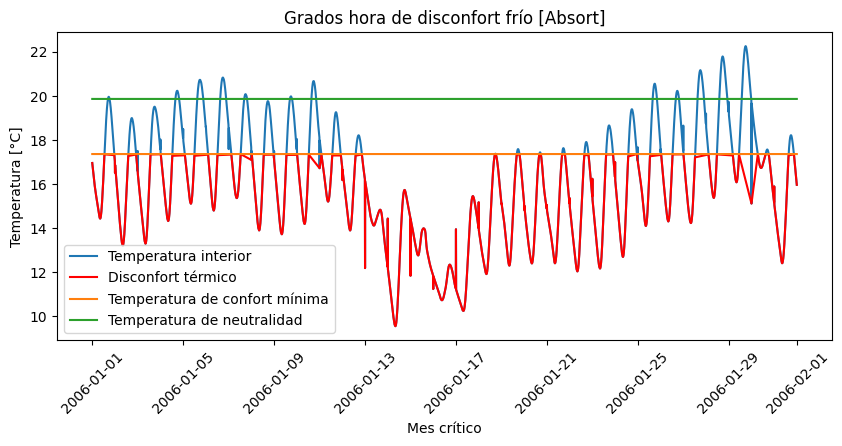

In [17]:
Absort_DDHcold = DDHfrio(Absort)
Absort_DDHcold

C:\Users\landa\AppData\Local\Temp\ipykernel_17148\1204235132.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


2077.5414113194115

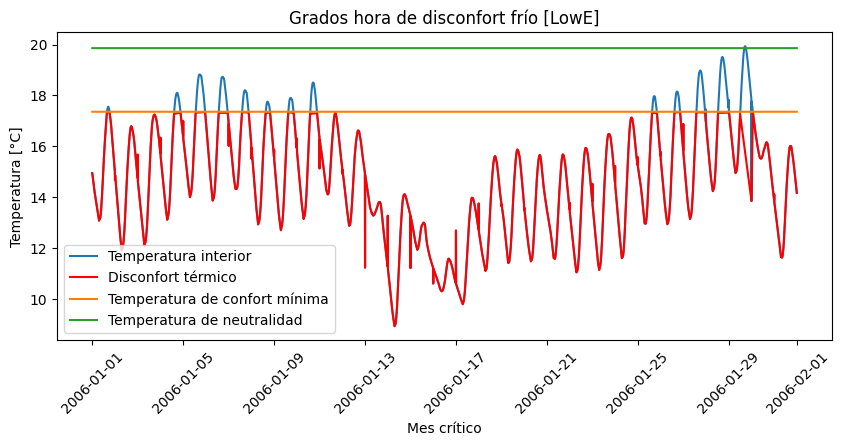

In [18]:
LowE_DDHcold = DDHfrio(LowE)
LowE_DDHcold

C:\Users\landa\AppData\Local\Temp\ipykernel_17148\1204235132.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


1596.8654507244346

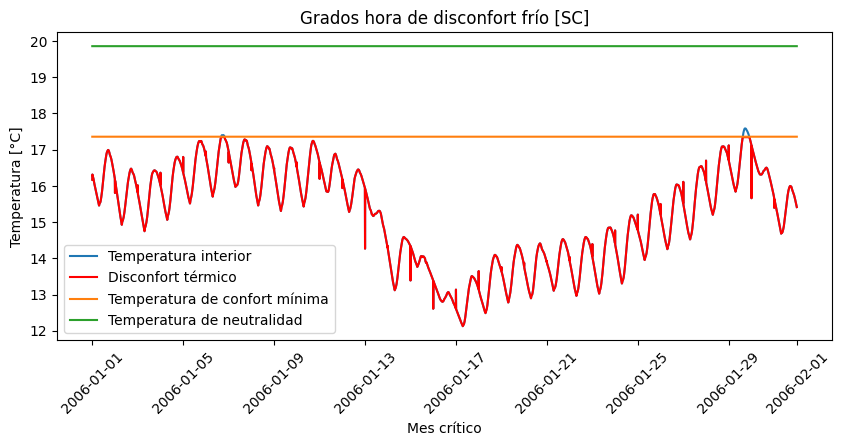

In [19]:
SC_DDHcold = DDHfrio(SC)
SC_DDHcold

C:\Users\landa\AppData\Local\Temp\ipykernel_17148\1204235132.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


241.5351507839131

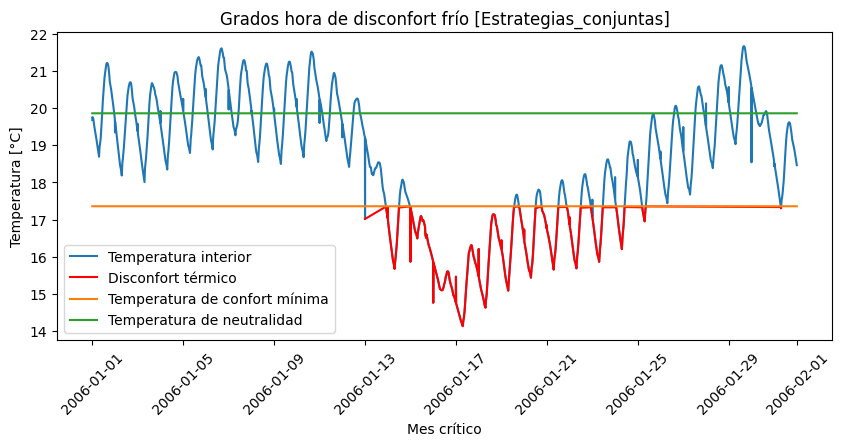

In [35]:
Todas_DDHcold = DDHfrio(Estrategias_conjuntas)
Todas_DDHcold

In [ ]:
def DDHcal(cb):
    
    nombre = [nombre for nombre, valor in globals().items() if valor is cb][0]
    #Calculando DDHcal
    cb_cal  = cb.loc['2006-05'].copy()
    

    cb_cal['Tn_up'] = Tn_up[4]
    cb_cal["Tn"] = Tn[4]

    cb_DDHcal = cb_cal.loc[cb_cal.Ti > cb_cal.Tn_up].Ti
    cb_Tn_up = cb_cal.loc[cb_cal.Ti > cb_cal.Tn_up].Tn_up

    deltaCal = cb_DDHcal - cb_Tn_up

    #Grados hora de disconfort calido
    DDHcal = deltaCal.sum()*1/6

    fig, ax = plt.subplots(figsize=(10,4))


    ax.plot(cb_cal.Ti, label = "Temperatura interior")
    ax.plot(cb_DDHcal,'r-', label = "Disconfort térmico")
    ax.plot(cb_cal.Tn_up, label = "Temperatura de confort máxima")
    ax.plot(cb_cal.Tn, label = "Temperatura de neutralidad")
    ax.set_ylabel("Temperatura [°C]")
    ax.set_xlabel("Mes crítico")
    ax.set_title("Grados hora de disconfort calido [" + nombre + "]")
    ax.legend()
    

    return DDHcal

In [ ]:
cb_DDHhot = DDHcal(cb)
cb_DDHhot

In [ ]:
Absort_DDHhot = DDHcal(Absort)
Absort_DDHhot

In [ ]:
LowE_DDHhot = DDHcal(LowE)
LowE_DDHhot

In [ ]:
SC_DDHhot = DDHcal(SC)
SC_DDHhot

In [ ]:
Todas_DDHhot = DDHcal(Estrategias_conjuntas)
Todas_DDHhot

----------------------------------------------------------------------------------------------------